In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
from ipywidgets import interact
from scipy.interpolate import CubicSpline

### 8.1 Interpolation

For points $ (0,0), (\pi/2,1) , (-\pi/2,-1)$ both the functions $$f(x)=sin(x)$$ and $$ f(x)=\frac{2x}{\pi}$$ work as interpolating functions.

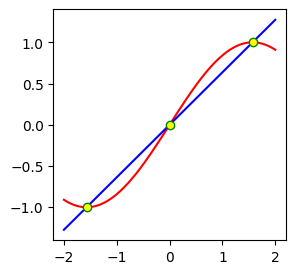

In [2]:
x = np.linspace(-2,2,100)
y=np.sin(x)
z=2*x/np.pi

plt.figure(figsize=(3,3))
plt.plot(x,y,'r')
plt.plot(x,z,'b')
plt.plot(0,0,marker='o', markersize=6, markeredgecolor='green', markerfacecolor = 'yellow')
plt.plot(np.pi/2,1,marker='o', markersize=6, markeredgecolor='green', markerfacecolor = 'yellow')
plt.plot(-np.pi/2,-1,marker='o', markersize=6, markeredgecolor='green', markerfacecolor = 'yellow')

plt.show()

### Interpolation by a single polynomial
Given $n$ points $(x_1,y_1), (x_2,y_2), \cdots (x_n,y_n)$, a degree $n-1$ polynomial can be found that passes through each of the $n$ points. That is,
$$ p(x) = c_0+c_1x+c_2x^2+ \cdots + c_{n-1}x^{n-1} .$$
<br>
If the polynomial passes through the above given points, it must satisfy the following system of linear equations.
$$\begin{pmatrix} 1 & x_1 & x_1^{2} & \cdots & x_1^{n-1}\\ 1 & x_2 & x_2^{2} & \cdots & x_2^{n-1}\\ & &  & \cdots\\ 1 & x_n& x_n^{2} & \cdots & x_n^{n-1} \end{pmatrix} \begin{pmatrix} c_0\\ c_1 \\ \cdots\\ c_{n-1} \end{pmatrix} = \begin{pmatrix} y_1\\ y_2 \\ \cdots\\ y_n \end{pmatrix}.
$$
<br>
Solving the above system gives us the values of $c_i$'s , $i=0,1,2,\cdots n-1$ for which the polynomial is a fit.

#### Example
Find a polynomial that interpolates the five points $$(0,1),(1,2),(2,2),(3,6),(4,9).$$

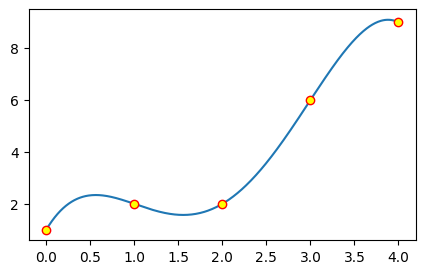

In [3]:
def polyInter(px,py):
    n = len(px)
    A = np.zeros([n,n])
    for i in range(n):
        A[:][i]=px**(i)
    A=A.T

    c=np.linalg.solve(A,py)

    x = np.linspace(px[0],px[n-1],500)
    y= np.sum(np.array([c[i]*x**i for i in range(n)]),axis=0)

    plt.figure(figsize=(5,3))
    plt.plot(x,y)
    for i in range(n):
        plt.plot(px[i],py[i],
                 marker='o', markersize=6,
                 markeredgecolor='red',
                 markerfacecolor = 'yellow')

    plt.show()

px = np.array([0,1,2,3,4])
py = np.array([1,2,2,6,9])
polyInter(px,py)

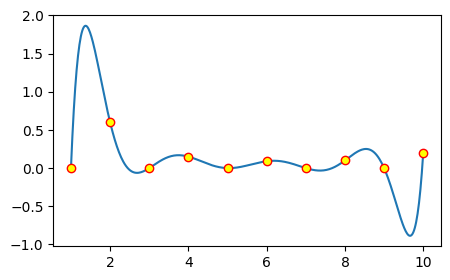

In [4]:
px = np.array([1,2,3,4,5,6,7,8,9,10])
py = np.array([0,0.6,0,0.15,0,0.09,0,0.1,0,0.2])
polyInter(px,py)

### Piecewise Polynomial Interpolation
#### Piecewise Linear Interpolation
For two data points $(x_0,y_0)$ and $(x_1,y_1)$ we can draw a straight line through the data points to interpolate. This straight line is given by the following equation:
$$y = y_0 + \frac{y_1-y_0}{x_1-x_0}(x-x_0).$$
<br>
Which can be rewritten as,
$$ y = y_0 \bigg( \frac{x-x_1}{x_0-x_1} \bigg) + y_1 \bigg( \frac{x-x_0}{x_1-x_0} \bigg) = y_0 L_0(x)+y_1 L_1(x).$$
<br>
Where, $L_0(x_0)=1,L_1(x_1)=0 \text{ and } L_1(x_0)=0,L_1(x_1)=1$

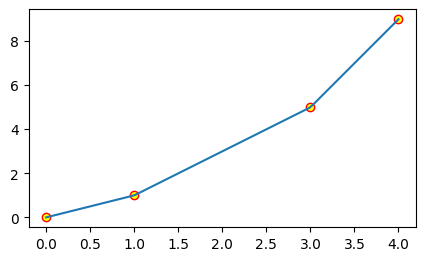

In [5]:
def interpolate(px,py,x,degree=1):
    for i in range(n-1):
        if px[i]<=x and px[i+1]>x:
            indx=i
        if px[n-1]==x:
            return py[n-1]

    y = py[indx]*(x-px[indx+1])/(px[indx]-px[indx+1]) \
      + py[indx+1]*(x-px[indx])/(px[indx+1]-px[indx])
    return y

px = np.array([0,1,3,4])
py = np.array([0,1,5,9])
n=len(px)
x = np.linspace(px[0],px[n-1], 100)
y = np.zeros(100)
#ind=np.logical_and(x>=1 ,x<=3)
#y[ind] = np.array([interpolate(px,py,xi) for xi in x[ind]
y = np.array([interpolate(px,py,xi) for xi in x])

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1/4)
plt.plot(x,y)
plt.scatter(px,py,c='yellow',edgecolor="red")

plt.show()

#### Cubic Spline

In **cubic spline interpolation** (as shown in the following figure), the interpolating function is a set of piecewise cubic functions. Specifically, we assume that the points $(x_i, y_i)$ and $(x_{i+1}, y_{i+1})$ are joined by a cubic polynomial $S_i(x) = a_i x^3 + b_i x^2 + c_i x + d_i$ that is valid for $x_i \le x \le x_{i+1}$ for $i = 1, \ldots, n-1$. To find the interpolating function, we must first determine the coefficients $a_i, b_i, c_i, d_i$ for each of the cubic functions. For $n$ points, there are $n-1$ cubic functions to find, and each cubic function requires four coefficients. Therefore we have a total of $4(n-1)$ unknowns, and so we need $4(n-1)$ independent equations to find all the coefficients.<br><br>

First we know that the cubic functions must intersect the data the points on the left and the right:
$$\begin{align*}
S_i(x_i) &= y_i, \quad i = 1, \ldots,n-1 \\
S_i(x_{i+1}) &= y_{i+1}, \quad i = 1, \ldots,n-1 \\
\end{align*}
$$

which gives us $2(n-1)$ equations. Next, we want each cubic function to join as smoothly with its neighbors as possible, so we constrain the splines to have continuous first and second derivatives at the data points $i = 2, \ldots,n-1.$<br>

$$\begin{align*}
S'_i(x_{i+1}) &= S'_{i+1}(x_{i+1}), \quad i = 1, \ldots,n-2, \\
S''_i(x_{i+1}) &= S''_{i+1}(x_{i+1}), \quad i = 1, \ldots,n-2, \\
\end{align*}
$$

which gives us $2(n-2)$ equations. Two more equations are required to compute the coefficients of $S_i(x)$. These last two constraints are arbitrary, and they can be chosen to fit the circumstances of the interpolation being performed. A common set of final constraints is to assume that the second derivatives are zero at the endpoints. This means that the curve is a \"straight line\" at the end points. Explicitly,

$$\begin{align*}
S''_1(x_1) &= 0, \\
S''_{n-1}(x_n) &= 0.
\end{align*}
$$
In Python, we can use function *CubicSpline* from package *scipy* to perform cubic spline interpolation. Note that the above constraints are not the same as the ones used by *scipy's CubicSpline* as default for performing cubic splines, there are different ways to add the final two constraints in scipy by setting the *bc_type* argument (see the help for *CubicSpline* to learn more about this).

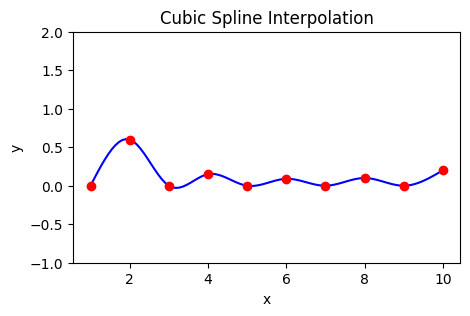

In [6]:
px = np.array([1,2,3,4,5,6,7,8,9,10])
py = np.array([0,0.6,0,0.15,0,0.09,0,0.1,0,0.2])
n=len(px)

f = CubicSpline(px, py, bc_type='natural')

x = np.linspace(px[0],px[n-1], 100)
y = f(x)
plt.figure(figsize = (5,3))
plt.plot(x, y, 'b')
plt.plot(px, py, 'ro')
plt.ylim(-1,2)
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Curve fitting

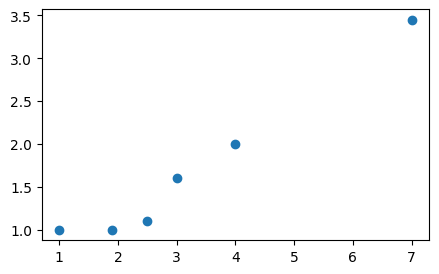

In [7]:
data = np.array([[1, 1.9, 2.5, 3, 4, 7], [1, 1, 1.1 ,1.6, 2, 3.45]])
plt.figure(figsize=(5,3))
plt.scatter(data[0], data[1])
plt.show()

### Linear fit

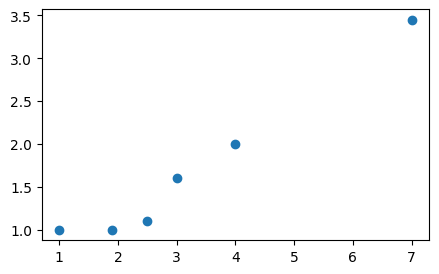

Constants are  0.26271837349397364  and  0.4419427710843378


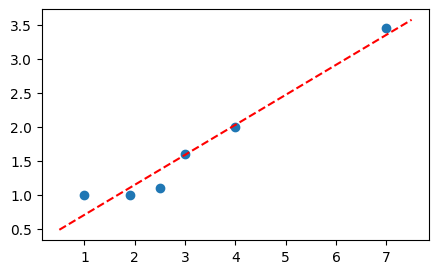

In [8]:
data = np.array([[1, 1.9, 2.5, 3, 4, 7], [1, 1, 1.1 ,1.6, 2, 3.45]])
plt.figure(figsize=(5,3))
plt.scatter(data[0], data[1])
plt.show()

n = len(data[0])
X=np.sum(data[0])
Y=np.sum(data[1])
W=np.sum(data[0]**2)
Z=np.sum(np.multiply(data[0],data[1]))
Z
c = np.matmul(np.linalg.inv(np.array([[n,X],[X,W]])),np.array([Y,Z]))
print("Constants are ",c[0], " and ", c[1])


x=np.linspace(0.5,7.5,100)
plt.figure(figsize=(5,3))
plt.scatter(data[0], data[1])
plt.plot(x, c[0]+c[1]*x,'r--')
plt.show()

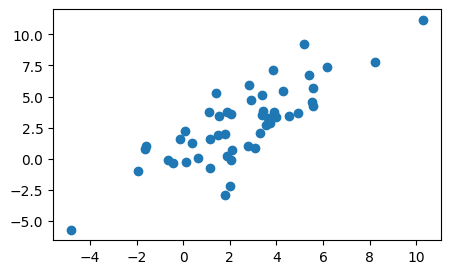

In [9]:
n=50
x = 2+3*np.random.normal(0,1,n)
avg = np.average(x)
yReal = x+1
r = np.random.normal(0,1,n)
y = x + 1+ 2*r/(1+np.average(x-avg))
r = np.random.rand(n)
y = y - 2*r/(1+np.average(x-avg))

#plt.plot(x,yReal)
plt.figure(figsize=(5,3))
plt.scatter(x,y)

plt.show()

Constants are  0.38280078266763173  and  0.9510799145824356


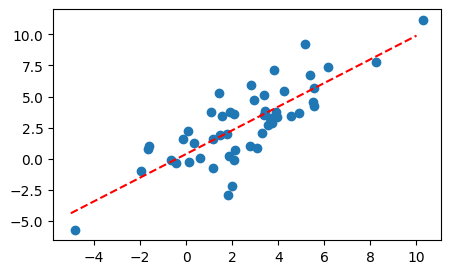

In [10]:
# @title
data = np.array([x, y])
n = len(data[0])
X=np.sum(data[0])
Y=np.sum(data[1])
W=np.sum(data[0]**2)
Z=np.sum(np.multiply(data[0],data[1]))
Z
c = np.matmul(np.linalg.inv(np.array([[n,X],[X,W]])),np.array([Y,Z]))
print("Constants are ",c[0], " and ", c[1])

p=np.linspace(-5,10,100)
plt.figure(figsize=(5,3))
plt.scatter(data[0], data[1])
plt.plot(p, c[0]+c[1]*p,'r--')
plt.show()

### Curve of best fit
Three types of curves we consider are:</br>
$$
\begin{align*}
    \text{1.} & y=be^{mx} \\
    \text{2.} & y = \frac{1}{mx+b}\\
    \text{3.} & y= bx^m
\end{align*}
$$

The procedure for finding curves of best fit:<br>
1. Linearize the data through transformation.<br>
2. Fit a line of best fit to the linearized data points.<br>
3. Reverse transform the line to get the curve of best fit.<br>

In [11]:
# @title
@interact
def exponential(b = 0.5, m=0.5):

    x = np.linspace(-3, 3, 500)
    x=np.array(x)
    y = 1/(m*x+b)
    z = 1/x
    #pos = np.where(np.abs(np.diff(y)) >= 10)[0]+1
    #x = np.insert(x, pos, np.nan)
    #y = np.insert(y, pos, np.nan)

    plt.plot(x, y)
    plt.plot(x,z,'r--' )
    plt.xlim(-2.1, 2.1)
    plt.ylim(-50, 50)
    plt.ylabel('')
    plt.xlabel('x')
    plt.title(' ')
    plt.show()
    return plt.figure()
plt.show()

interactive(children=(FloatSlider(value=0.5, description='b', max=1.5, min=-0.5), FloatSlider(value=0.5, descr…

<Figure size 640x480 with 0 Axes>

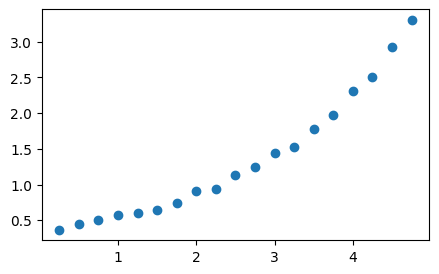

In [12]:
x = np.array(np.linspace(0.25,4.75,19))
y = np.array([0.3662, 0.4506, 0.5054, 0.5694, 0.6055, 0.6435, 0.7426, 0.9068, 0.9393, 1.1297, 1.2404, 1.4441, 1.5313, 1.7706, 1.9669, 2.3129, 2.5123, 2.9238, 3.3070])
plt.figure(figsize=(5,3))
plt.scatter(x,y)
plt.show()

If the data is exponential, then $(x,log(y))$ should look linear

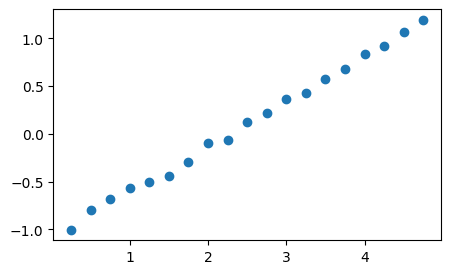

In [13]:
# log(y)
plt.figure(figsize=(5,3))
plt.scatter(x,np.log(y))
plt.show()

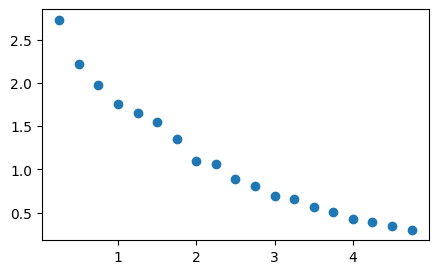

In [14]:
# 1/y
plt.figure(figsize=(5,3))
plt.scatter(x,1/y)
plt.show()

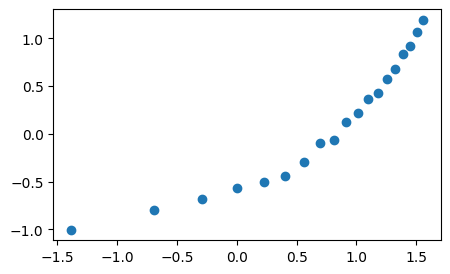

In [15]:
# (log x, log y)
plt.figure(figsize=(5,3))
plt.scatter(np.log(x),np.log(y))
plt.show()

In [16]:
n = len(x)
logy=np.log(y)
X=np.sum(x)
Y=np.sum(logy)
W=np.sum(x**2)
Z=np.sum(np.multiply(x,logy))

c = np.matmul(np.linalg.inv(np.array([[n,X],[X,W]])),np.array([Y,Z]))

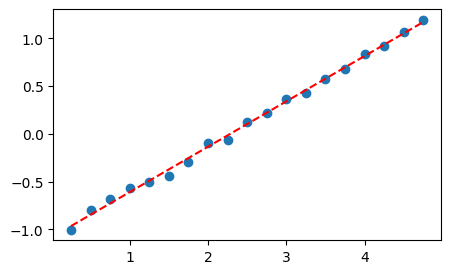

In [17]:
xval=np.linspace(0.25,4.75,100)
plt.figure(figsize=(5,3))
plt.scatter(x, logy)
plt.plot(xval, c[0]+c[1]*xval,'r--')
plt.show()

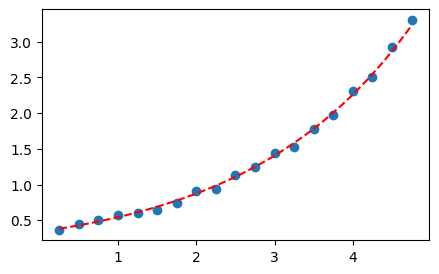

In [18]:
xval=np.linspace(0.25,4.75,100)
plt.figure(figsize=(5,3))
plt.scatter(x, y)
plt.plot(xval, np.exp(c[0]+c[1]*xval),'r--')
plt.show()